# Module 2 - Supervised Learning - Support Vector Machines

---

## Imports

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
import sys
import tensorflow as tf
from tensorflow import keras
import time
from tqdm import tqdm

%matplotlib inline
print(tf.__version__)

1.8.0


---

## Load Data

In [112]:
state = 'GA'

current_dir = os.getcwd()
load_dir = current_dir + '\\module1_data\\' + state

#uncomment 1
# data = 'Xstate_f194.npy' #original
# data = 'Xforest_f102.npy' #random forest feature importance
data = 'Xpca_f194_c049_v9713.npy' #principle components

X = np.load(load_dir + '\\' + data)
print(X.shape)

y = np.load(load_dir + '\\ystate.npy')
y = y - 1
print(y.shape)

(83620, 49)
(83620, 1)


In [113]:
#DO NOT CHANGE

#split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=0, shuffle=True)

print('X train:', X_train.shape)
print('y train:', y_train.shape)
print('X test: ', X_test.shape)
print('y test: ', y_test.shape)

X train: (58533, 49)
y train: (58533, 1)
X test:  (25086, 49)
y test:  (25086, 1)


[ 3.08289779e-03 -8.36374823e-04  2.67670785e-04 -8.38474300e-04
  3.35366783e-04  1.21075050e-03 -8.68244502e-04  1.86759483e-05
  3.31504142e-04  3.96761873e-04  1.16418935e-03 -7.71415417e-04
  6.91581876e-04 -1.59449158e-03  4.42633494e-04 -7.91750761e-04
 -4.73202943e-04 -2.08403134e-04 -3.79787513e-05 -5.24518301e-04
 -3.11146782e-04 -1.13634605e-03 -2.34295590e-05  2.13783365e-04
  6.37799066e-04  4.02632870e-04  1.00309293e-03 -2.10671076e-04
  1.23964775e-04 -2.68502379e-04  7.57174256e-04  1.09552387e-05
  2.95293237e-04 -5.03065823e-04  2.57414132e-04 -4.70171254e-04
 -3.67007255e-04  7.04891952e-05  3.95240342e-04  1.09127132e-04
  5.85358088e-04 -5.64936101e-04 -4.95529507e-04 -4.63186710e-04
  7.72099293e-05 -3.04828110e-04 -8.37896404e-05 -5.38542599e-04
 -4.00956616e-05]
[0.91970128 0.54917387 0.51079656 0.5000217  0.49755466 0.39368919
 0.36592454 0.34994317 0.33749508 0.33071907 0.32369258 0.31600268
 0.30732568 0.305016   0.28953907 0.28780044 0.28512956 0.25980753
 

Text(0.5,1,'X_train')

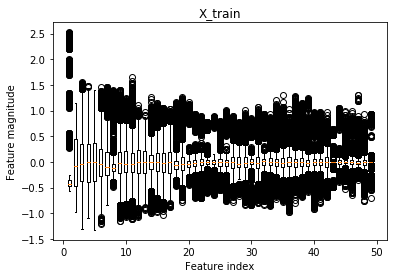

In [114]:
np.set_printoptions(threshold=sys.maxsize)
print(np.mean(X_train, axis=0))
print(np.std(X_train, axis=0))
print(np.min(X_train, axis=0))
print(np.max(X_train, axis=0))

plt.boxplot(X_train, manage_xticks=False)
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude')
plt.title('X_train')

In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

[0.18494682 0.45682025 0.45623521 0.42501373 0.48709999 0.45305251
 0.36243081 0.25669744 0.45102143 0.46592593 0.40427249 0.49267942
 0.49111582 0.44180512 0.46134786 0.49555454 0.45832882 0.28886692
 0.38515599 0.28117941 0.42772211 0.44174069 0.43659218 0.42080422
 0.41141434 0.42812356 0.46822893 0.45605141 0.45137846 0.49782381
 0.42682222 0.47291271 0.47654734 0.37894748 0.37676129 0.48341768
 0.38444236 0.37074758 0.31831275 0.48997146 0.44883345 0.41437557
 0.43209444 0.27395429 0.34855846 0.397661   0.21474101 0.45325106
 0.42899811]
[0.29700667 0.25829365 0.1783832  0.19364095 0.18268649 0.14797637
 0.15931236 0.18527543 0.13183911 0.14289653 0.11681016 0.14391103
 0.16156778 0.13492244 0.13622487 0.13790089 0.14938821 0.15734815
 0.12490286 0.1458484  0.14194521 0.14159842 0.16217195 0.14524269
 0.16474297 0.12402915 0.12994004 0.14548218 0.11205699 0.12136574
 0.10872308 0.11263495 0.11104977 0.10108995 0.09335979 0.09529653
 0.09063104 0.10179315 0.10112781 0.095487   0.09

Text(0.5,1,'X_train_scaled')

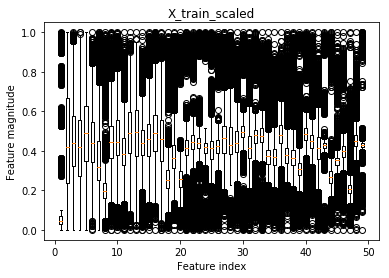

In [116]:
np.set_printoptions(threshold=sys.maxsize)
print(np.mean(X_train_scaled, axis=0))
print(np.std(X_train_scaled, axis=0))
print(np.min(X_train_scaled, axis=0))
print(np.max(X_train_scaled, axis=0))

plt.boxplot(X_train_scaled, manage_xticks=False)
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude')
plt.title('X_train_scaled')

In [117]:
from sklearn.svm import SVC

def run_svm(X_train, y_train, X_test, y_test):
    C = []
    gamma = []
    accuracy_train = []
    accuracy_test = []
    
    for c in tqdm([1000, 100, 10, 1, 0.1, 0.01, 0.001]):
        for g in [100, 10, 1, 0.1, 0.01, 0.001]:
            C.append(c)
            gamma.append(g)
            
            start_time = time.time()
            svm = SVC(kernel='rbf', C=c, gamma=g).fit(X_train, y_train)
            fit_time = time.time() - start_time
            
            start_time = time.time()
            score_train = svm.score(X_train, y_train)
            score_test = svm.score(X_test, y_test)
            score_time = time.time() - start_time
            accuracy_train.append(score_train)
            accuracy_test.append(score_test)
            
#             print('C = %.4f, gamma = %.4f' % (c, g), '|', 'Accuracy train: %.4f' % (score_train), '|', 'Accuracy test: %.4f' % (score_test), '|', ('Fit: %.4f (sec), Score: %.4f (sec)' % (fit_time, score_time)))
    
    fig, ((ax1), (ax2), (ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
    ax1 = plt.subplot(1, 3, 1)
    plt.xlabel('C')
    plt.ylabel('gamma')
    plt.title('train')
    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(C, gamma, c=accuracy_train, cmap='cool')
    plt.colorbar()
    
    ax2 = plt.subplot(1, 3, 2)
    plt.xlabel('C')
    plt.ylabel('gamma')
    plt.title('test')
    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(C, gamma, c=accuracy_test, cmap='cool')
    plt.colorbar()
    
    ax3 = plt.subplot(1, 3, 3)
    plt.xlabel('C')
    plt.ylabel('gamma')
    plt.title('difference')
    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(C, gamma, c=np.subtract(np.array(accuracy_train), np.array(accuracy_test)), cmap='viridis')
    plt.colorbar()
    
#     save_dir = current_dir + '\\module2_data\\' + state + '\\SupportVectorMachines'
#     filename = save_dir + '\SVM_accuracy_.png'
#     fig.savefig(filename)

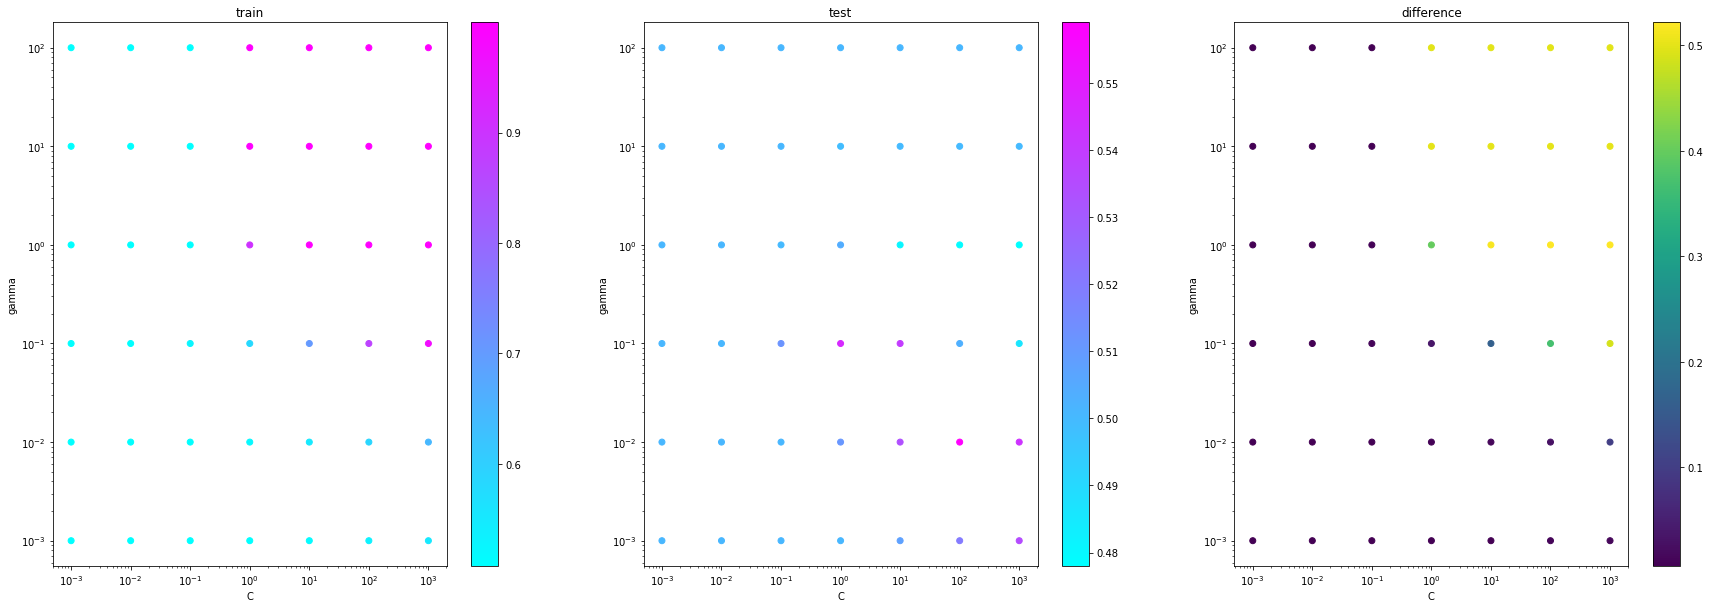

In [118]:
train_index = 10000
test_index = 1000
run_svm(X_train[0:train_index, :], y_train[0:train_index, 0], X_test[0:test_index, :], y_test[0:test_index, 0])

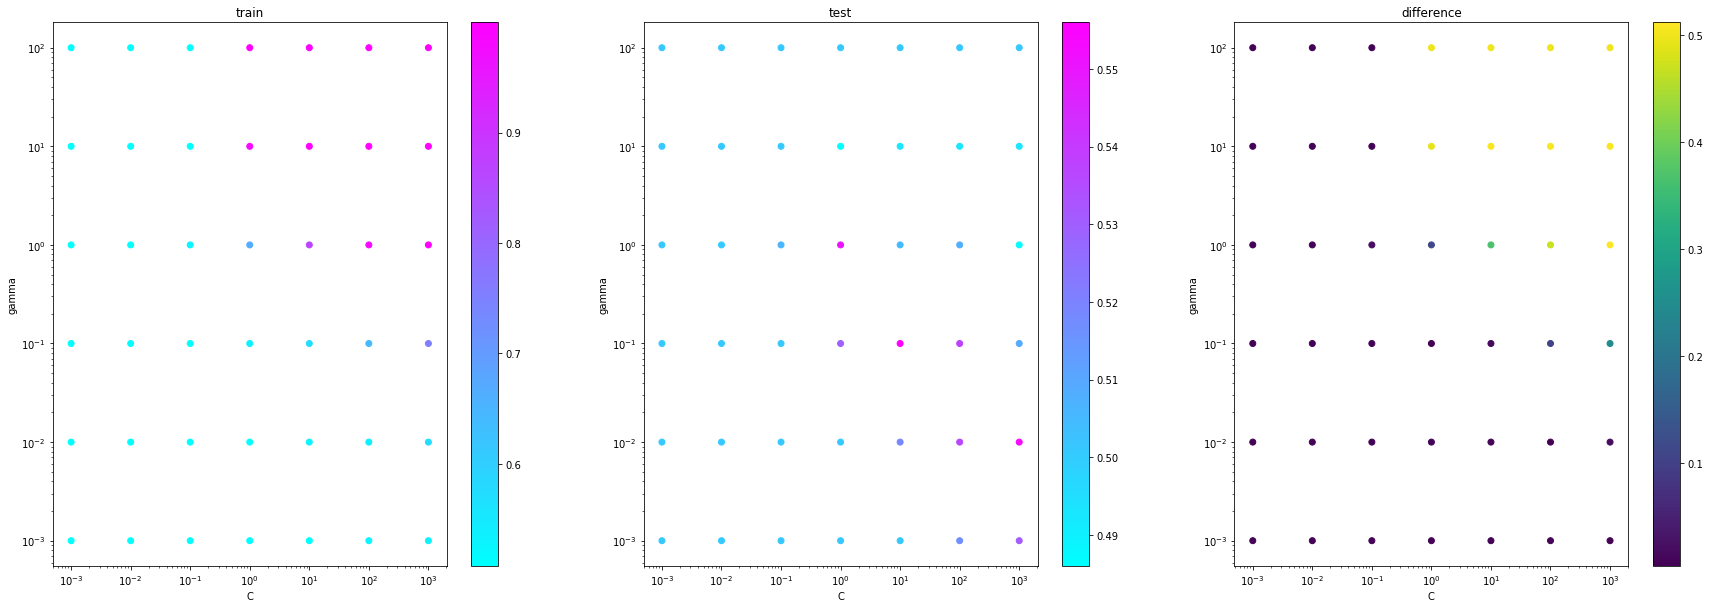

In [119]:
train_index = 10000
test_index = 1000
run_svm(X_train_scaled[0:train_index, :], y_train[0:train_index, 0], X_test_scaled[0:test_index, :], y_test[0:test_index, 0])

In [121]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, max_features=0.5, bootstrap=True, verbose=1).fit(X_train, y_train[:, 0])
clf.score(X_test, y_test[:, 0])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\alexa\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\alexa\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\alexa\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explic

0.5131148847963007

## Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

clf = Perceptron(penalty=None, fit_intercept=True, max_iter=100000, tol=1e-5, verbose=1, shuffle=True, early_stopping=False)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
#Attributes

print(clf.coef_.shape)
print(clf.intercept_)
print(clf.n_iter_)
print(clf.classes_)
print(clf.t_)

In [ ]:
predictions = clf.predict(X_test)
print(np.sum(predictions[:] == y_test[:, 0]), '/', predictions.shape[0])

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

svc = LinearSVC(tol=1e-5, multi_class='ovr', verbose=1, random_state=0)
clf = OneVsRestClassifier(svc).fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
#Attributes

print(clf.coef_.shape)
print(clf.intercept_)
print(clf.classes_)

In [ ]:
predictions = clf.predict(X_test)
print(np.sum(predictions[:] == y_test[:, 0]), '/', predictions.shape[0])

## Convex Hull

In [ ]:
# from scipy.spatial import ConvexHull

# hull1 = ConvexHull(X_train[np.where(y_train == 0), :])
# hull2 = ConvexHull(X_train[np.where(y_train == 1), :])
# hull3 = ConvexHull(X_train[np.where(y_train == 2), :])
# hull4 = ConvexHull(X_train[np.where(y_train == 3), :])

## RBF Kernel

In [ ]:
# from sklearn.svm import SVC

# clf = SVC(gamma=2, C=1, kernel='rbf', verbose=1, decision_function_shape='ovr')
# clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

In [ ]:
# #Attributes

# print(clf.classes_)
# print(clf.n_support_)

In [ ]:
# predictions = clf.predict(X_test)

In [ ]:
# print(np.sum(predictions[np.where(y_test[:, 0] == 0)[0]] == y_test[np.where(y_test[:, 0] == 0)[0], 0]), '/', np.where(y_test[:, 0] == 0)[0].shape[0])
# print(np.sum(predictions[np.where(y_test[:, 0] == 1)[0]] == y_test[np.where(y_test[:, 0] == 1)[0], 0]), '/', np.where(y_test[:, 0] == 1)[0].shape[0])
# print(np.sum(predictions[np.where(y_test[:, 0] == 2)[0]] == y_test[np.where(y_test[:, 0] == 2)[0], 0]), '/', np.where(y_test[:, 0] == 2)[0].shape[0])
# print(np.sum(predictions[np.where(y_test[:, 0] == 3)[0]] == y_test[np.where(y_test[:, 0] == 3)[0], 0]), '/', np.where(y_test[:, 0] == 3)[0].shape[0])

In [ ]:
# from sklearn.metrics import confusion_matrix, f1_score

# # confusion_matrix(y_test, predictions, labels=["0", "1", "2", "3"])

# f1_score(y_test, predictions, average='macro')

---

## Support Vector Machines

### Setup

### Test Set

### Save Model / Results

In [ ]:
save_dir = current_dir + '\\module2_data\\' + state + '\\SupportVectorMachines'
print(save_dir)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)